In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Federal_Public_Service_Employment_Data.csv')

In [3]:
df.describe()

,Year,Total Federal Public Service,Core Public Administration,Separate Agencies,Canadian Population
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,2017.000000,292311.266667,223140.333333,69170.933333,3.672594e+07
std,4.472136,36571.777646,28017.908823,8675.964619,2.092975e+06
min,2010.000000,257034.000000,195330.000000,61469.000000,3.389046e+07
25%,2013.500000,262756.500000,200103.500000,62653.000000,3.513855e+07
50%,2017.000000,282352.000000,216596.000000,66064.000000,3.639714e+07
75%,2020.500000,310025.500000,238457.500000,71568.000000,3.807393e+07
max,2024.000000,367772.000000,282152.000000,86449.000000,4.101256e+07


In [4]:
df.set_index('Year', inplace=True)

In [5]:
df.describe()

,Total Federal Public Service,Core Public Administration,Separate Agencies,Canadian Population
count,15.000000,15.000000,15.000000,1.500000e+01
mean,292311.266667,223140.333333,69170.933333,3.672594e+07
std,36571.777646,28017.908823,8675.964619,2.092975e+06
min,257034.000000,195330.000000,61469.000000,3.389046e+07
25%,262756.500000,200103.500000,62653.000000,3.513855e+07
50%,282352.000000,216596.000000,66064.000000,3.639714e+07
75%,310025.500000,238457.500000,71568.000000,3.807393e+07
max,367772.000000,282152.000000,86449.000000,4.101256e+07


In [6]:
# avg_increases = df.iloc[:,:2].diff().mean()
# Calculate average annual increase for Total Federal Public Service
df["FPS Increase"] = df["Total Federal Public Service"].diff()
fps_avg_increase = df["FPS Increase"].mean()

# Calculate average annual increase for Core Public Administration
df["CPA Increase"] = df["Core Public Administration"].diff()
cpa_avg_increase = df["CPA Increase"].mean()

fps_avg_increase, cpa_avg_increase

(6056.571428571428, 4682.571428571428)

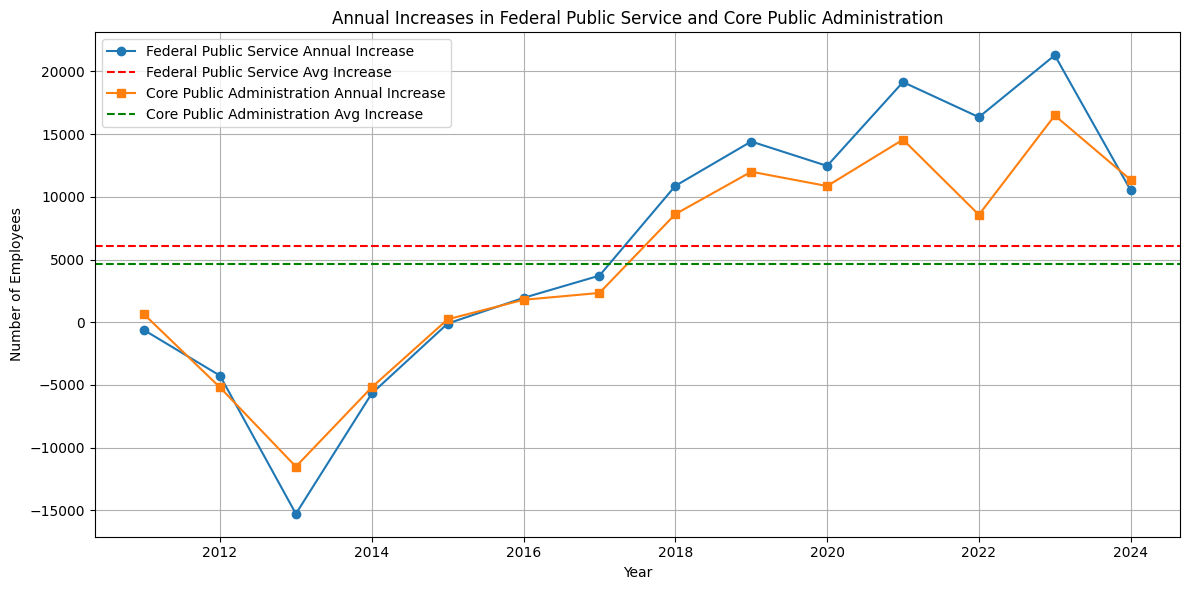

In [7]:
import matplotlib.pyplot as plt


# Set up the figure
plt.figure(figsize=(12, 6))

# Plot Total Federal Public Service Increase
plt.plot(df.index, df["FPS Increase"], marker='o', label="Federal Public Service Annual Increase")
plt.axhline(y=fps_avg_increase, color='red', linestyle='--', label="Federal Public Service Avg Increase")

# Plot Core Public Administration Increase
plt.plot(df.index, df["CPA Increase"], marker='s', label="Core Public Administration Annual Increase")
plt.axhline(y=cpa_avg_increase, color='green', linestyle='--', label="Core Public Administration Avg Increase")

# Labels and legend
plt.title("Annual Increases in Federal Public Service and Core Public Administration")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
df

,Total Federal Public Service,Core Public Administration,Separate Agencies,Canadian Population,FPS Increase,CPA Increase
Year,,,,,,
2010,282980,216596,66384,33890461,NaN,NaN
2011,282352,217224,65128,34230555,-628.0,628.0
2012,278092,212028,66064,34592192,-4260.0,-5196.0
2013,262817,200516,62301,34956567,-15275.0,-11512.0
2014,257138,195330,61808,35320540,-5679.0,-5186.0
2015,257034,195565,61469,35606734,-104.0,235.0
2016,258979,197354,61625,35970407,1945.0,1789.0
2017,262696,199691,63005,36397141,3717.0,2337.0
2018,273571,208312,65259,36903671,10875.0,8621.0


In [9]:
df["FPS % of Pop Growth"] = df["FPS Increase"] / df["Canadian Population"].diff() * 100
df["CPA % of Pop Growth"] = df["CPA Increase"] / df["Canadian Population"].diff() * 100


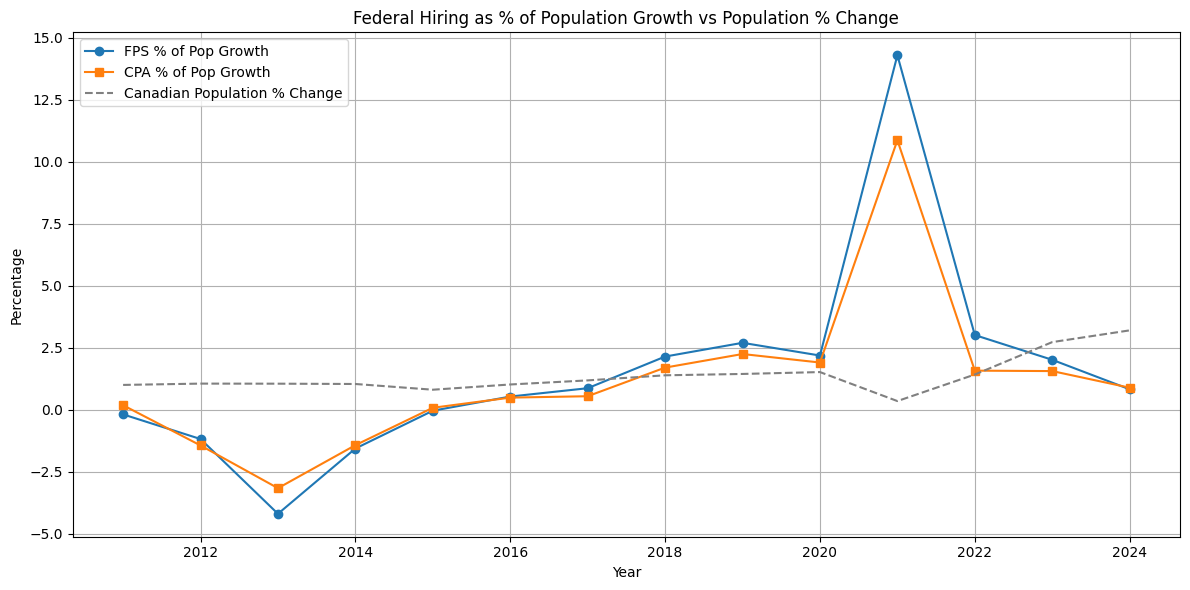

In [10]:
# Calculate year-over-year % changes
df["Pop % Change"] = df["Canadian Population"].pct_change() * 100
df["FPS % of Pop Growth"] = df["FPS Increase"] / df["Canadian Population"].diff() * 100
df["CPA % of Pop Growth"] = df["CPA Increase"] / df["Canadian Population"].diff() * 100

# Plotting the percentage comparisons
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["FPS % of Pop Growth"], marker='o', label="FPS % of Pop Growth")
plt.plot(df.index, df["CPA % of Pop Growth"], marker='s', label="CPA % of Pop Growth")
plt.plot(df.index, df["Pop % Change"], linestyle='--', color='gray', label="Canadian Population % Change")

# Improve styling
plt.title("Federal Hiring as % of Population Growth vs Population % Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Proceeding to normalize data per 1,000 people

In [12]:
df['Federal Employees per 1,000 People'] = df['Total Federal Public Service'] / df['Canadian Population'] * 1000
df['Core Admin per 1,000 People'] = df['Core Public Administration'] / df['Canadian Population'] * 1000
df['Separate Agencies per 1,000 People'] = df['Separate Agencies'] / df['Canadian Population'] *1000

In [14]:
df.head()

,Total Federal Public Service,Core Public Administration,Separate Agencies,Canadian Population,FPS Increase,CPA Increase,FPS % of Pop Growth,CPA % of Pop Growth,Pop % Change,"Federal Employees per 1,000 People","Core Admin per 1,000 People","Separate Agencies per 1,000 People"
Year,,,,,,,,,,,,
2010,282980,216596,66384,33890461,NaN,NaN,NaN,NaN,NaN,8.349842,6.391061,1.958781
2011,282352,217224,65128,34230555,-628.0,628.0,-0.184655,0.184655,1.003510,8.248537,6.345909,1.902628
2012,278092,212028,66064,34592192,-4260.0,-5196.0,-1.177977,-1.436800,1.056474,8.039155,6.129360,1.909795
2013,262817,200516,62301,34956567,-15275.0,-11512.0,-4.192110,-3.159383,1.053345,7.518387,5.736147,1.782240
2014,257138,195330,61808,35320540,-5679.0,-5186.0,-1.560281,-1.424831,1.041215,7.280127,5.530210,1.749917


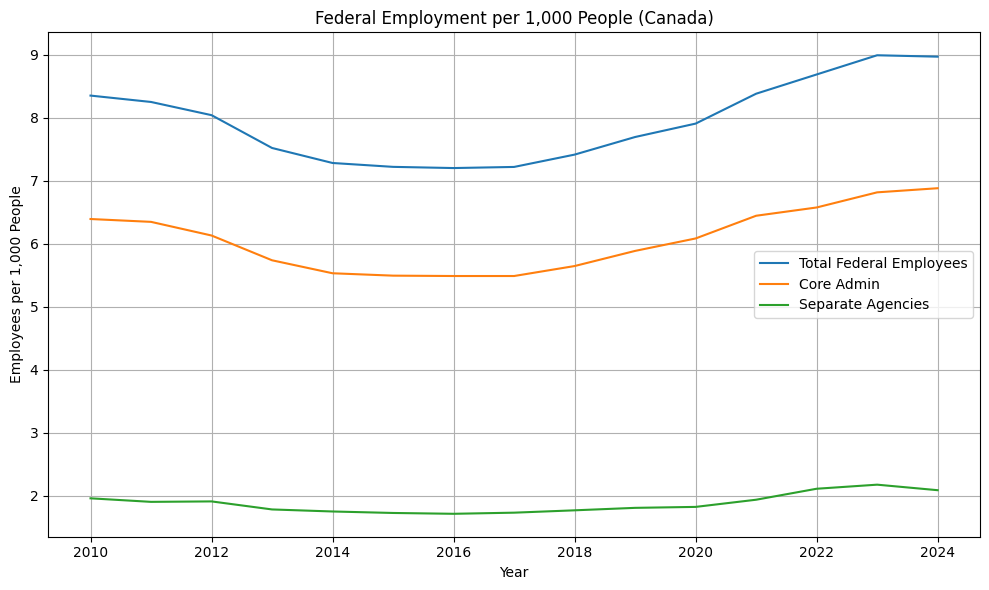

In [19]:
# Set figure size and style
plt.figure(figsize=(10, 6))

# Plot the normalized columns
plt.plot(df.index, df["Federal Employees per 1,000 People"], label="Total Federal Employees")
plt.plot(df.index, df["Core Admin per 1,000 People"], label="Core Admin")
plt.plot(df.index, df["Separate Agencies per 1,000 People"], label="Separate Agencies")

# Add labels and title
plt.title("Federal Employment per 1,000 People (Canada)")
plt.xlabel("Year")
plt.ylabel("Employees per 1,000 People")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


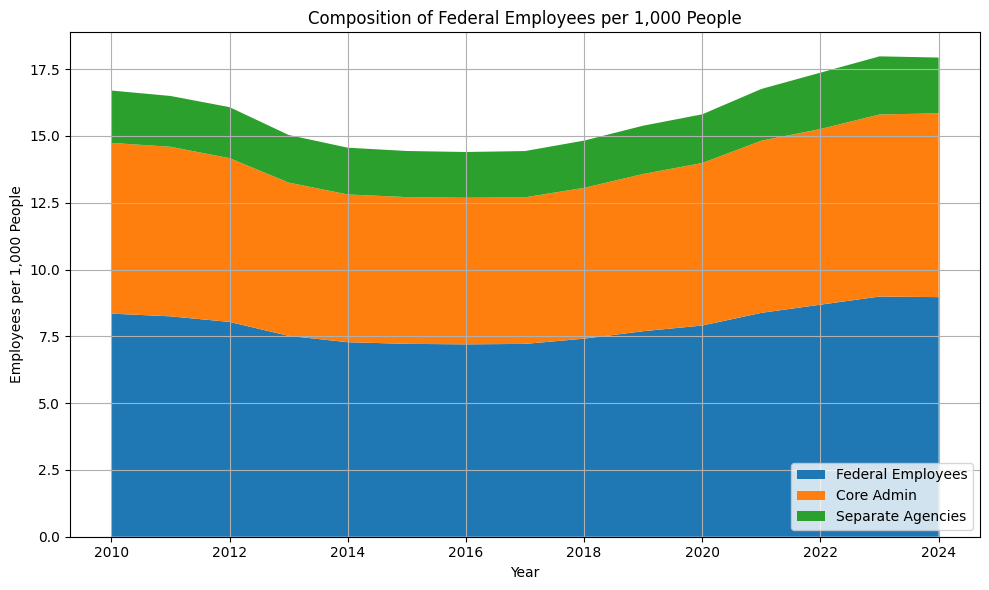

In [22]:
plt.figure(figsize=(10, 6))

plt.stackplot(
    df.index,
    df['Federal Employees per 1,000 People'],
    df["Core Admin per 1,000 People"],
    df["Separate Agencies per 1,000 People"],
    labels=["Federal Employees","Core Admin", "Separate Agencies"]
)

plt.title("Composition of Federal Employees per 1,000 People")
plt.xlabel("Year")
plt.ylabel("Employees per 1,000 People")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
